# Data Analysis: Umsatz, Kiwo, and Wetter

This notebook imports and merges data from three CSV files and performs descriptive statistics and visualizations.

In [15]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Import Data from CSV Files

In [16]:
# Load the three CSV files
umsatzdaten_df = pd.read_csv('umsatzdaten_gekuerzt.csv')
kiwo_df = pd.read_csv('kiwo.csv')
wetter_df = pd.read_csv('wetter.csv')

# Display basic information about each dataset
print('Umsatzdaten Shape:', umsatzdaten_df.shape)
print('Kiwo Shape:', kiwo_df.shape)
print('Wetter Shape:', wetter_df.shape)

Umsatzdaten Shape: (9334, 4)
Kiwo Shape: (72, 2)
Wetter Shape: (2601, 5)


In [17]:
# Preview the first few rows of each dataset
print('\n--- Umsatzdaten Preview ---')
display(umsatzdaten_df.head())

print('\n--- Kiwo Preview ---')
display(kiwo_df.head())

print('\n--- Wetter Preview ---')
display(wetter_df.head())


--- Umsatzdaten Preview ---


,id,Datum,Warengruppe,Umsatz
0,1307011,2013-07-01,1,148.828353
1,1307021,2013-07-02,1,159.793757
2,1307031,2013-07-03,1,111.885594
3,1307041,2013-07-04,1,168.864941
4,1307051,2013-07-05,1,171.280754



--- Kiwo Preview ---


,Datum,KielerWoche
0,2012-06-16,1
1,2012-06-17,1
2,2012-06-18,1
3,2012-06-19,1
4,2012-06-20,1



--- Wetter Preview ---


,Datum,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
0,2012-01-01,8.0,9.8250,14,58.0
1,2012-01-02,7.0,7.4375,12,NaN
2,2012-01-03,8.0,5.5375,18,63.0
3,2012-01-04,4.0,5.6875,19,80.0
4,2012-01-05,6.0,5.3000,23,80.0


## 2. Merge DataFrames

**Note:** Adjust the merge keys based on your actual column names. Common keys might be 'Datum', 'Date', or similar.

In [18]:
# Check column names to identify merge keys
print('Umsatzdaten columns:', umsatzdaten_df.columns.tolist())
print('Kiwo columns:', kiwo_df.columns.tolist())
print('Wetter columns:', wetter_df.columns.tolist())

Umsatzdaten columns: ['id', 'Datum', 'Warengruppe', 'Umsatz']
Kiwo columns: ['Datum', 'KielerWoche']
Wetter columns: ['Datum', 'Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 'Wettercode']


In [19]:
# Example merge - adjust the 'on' parameter based on your common column
# If the column names differ, use left_on and right_on parameters

# Merge umsatzdaten with kiwo
merged_df = pd.merge(umsatzdaten_df, kiwo_df, how='inner', on='Datum')

# Merge with wetter
merged_df = pd.merge(merged_df, wetter_df, how='inner', on='Datum')

print('Merged DataFrame Shape:', merged_df.shape)
display(merged_df.head())

Merged DataFrame Shape: (223, 9)


,id,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
0,1406211,2014-06-21,1,162.410673,1,6.0,15.5125,18,61.0
1,1406221,2014-06-22,1,99.627613,1,5.0,15.7000,19,NaN
2,1406231,2014-06-23,1,130.997405,1,4.0,16.5000,17,NaN
3,1406241,2014-06-24,1,119.068456,1,7.0,14.3625,7,21.0
4,1406251,2014-06-25,1,114.248640,1,0.0,18.4375,10,NaN


## 3. Descriptive Statistics

In [20]:
# Overall descriptive statistics
print('=== Descriptive Statistics for All Variables ===')
display(merged_df.describe())

# Data types and missing values
print('\n=== Data Info ===')
print(merged_df.info())

print('\n=== Missing Values ===')
print(merged_df.isnull().sum())

=== Descriptive Statistics for All Variables ===


,id,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
count,2.230000e+02,223.000000,223.000000,223.0,223.000000,223.000000,223.000000,165.000000
mean,1.606675e+06,2.991031,260.559219,1.0,4.910314,18.418161,11.515695,48.575758
std,1.421961e+05,1.420541,177.014984,0.0,2.066688,3.266123,3.986291,30.539888
min,1.406211e+06,1.000000,46.452105,1.0,0.000000,11.562500,5.000000,0.000000
25%,1.506222e+06,2.000000,127.937248,1.0,4.000000,16.500000,8.000000,21.000000
50%,1.606223e+06,3.000000,213.304835,1.0,5.000000,18.000000,10.000000,61.000000
75%,1.706234e+06,4.000000,368.270772,1.0,7.000000,20.125000,14.000000,61.000000
max,1.806245e+06,5.000000,861.858617,1.0,8.000000,27.875000,20.000000,95.000000



=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   223 non-null    int64  
 1   Datum                223 non-null    object 
 2   Warengruppe          223 non-null    int64  
 3   Umsatz               223 non-null    float64
 4   KielerWoche          223 non-null    int64  
 5   Bewoelkung           223 non-null    float64
 6   Temperatur           223 non-null    float64
 7   Windgeschwindigkeit  223 non-null    int64  
 8   Wettercode           165 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 15.8+ KB
None

=== Missing Values ===
id                      0
Datum                   0
Warengruppe             0
Umsatz                  0
KielerWoche             0
Bewoelkung              0
Temperatur              0
Windgeschwindigkeit     0
Wettercode             58
d

In [21]:
# Correlation matrix
print('=== Correlation Matrix ===')
correlation_matrix = merged_df.select_dtypes(include=[np.number]).corr()
display(correlation_matrix)

=== Correlation Matrix ===


,id,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
id,1.000000,2.260173e-03,-0.064358,NaN,-0.122418,0.198990,0.247499,-1.953806e-01
Warengruppe,0.002260,1.000000e+00,-0.072629,NaN,-0.000275,-0.004285,0.000820,-2.200222e-16
Umsatz,-0.064358,-7.262906e-02,1.000000,NaN,0.089412,-0.068211,0.081403,1.057266e-01
KielerWoche,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bewoelkung,-0.122418,-2.752158e-04,0.089412,NaN,1.000000,-0.533662,0.098590,4.362139e-01
Temperatur,0.198990,-4.285102e-03,-0.068211,NaN,-0.533662,1.000000,-0.343238,-2.177512e-01
Windgeschwindigkeit,0.247499,8.204406e-04,0.081403,NaN,0.098590,-0.343238,1.000000,-9.099587e-02
Wettercode,-0.195381,-2.200222e-16,0.105727,NaN,0.436214,-0.217751,-0.090996,1.000000e+00


## 4. Visualizations

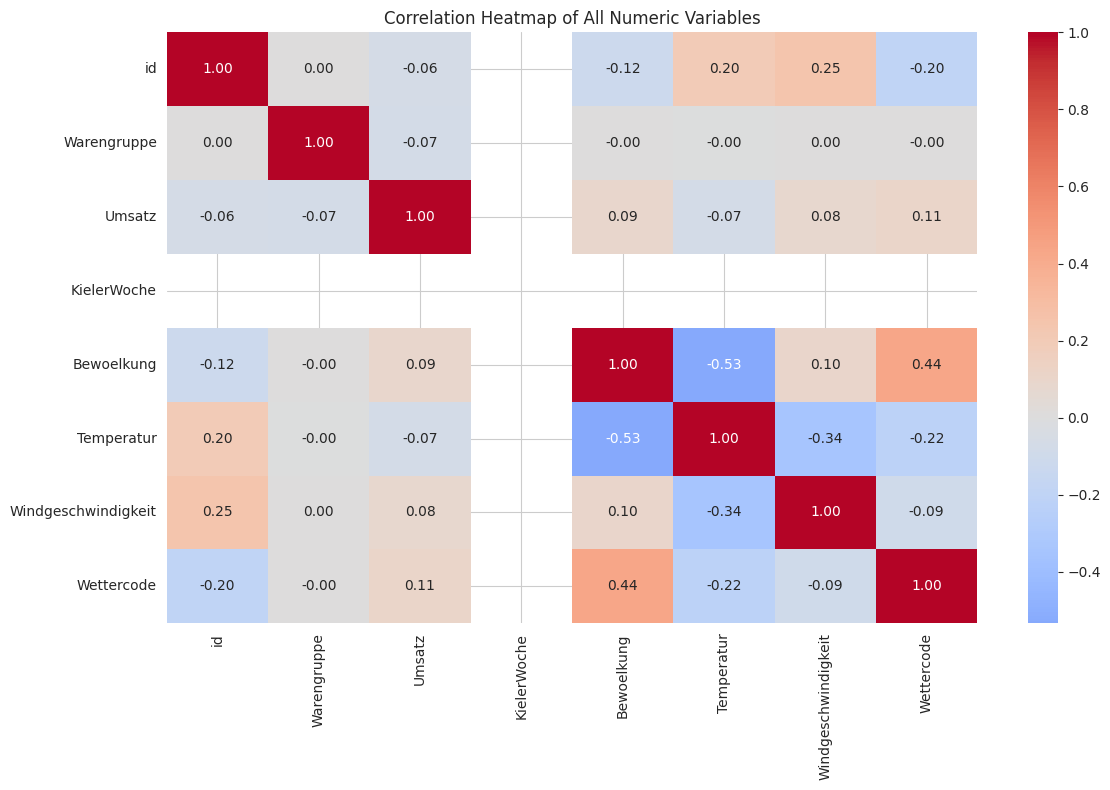

In [22]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of All Numeric Variables')
plt.tight_layout()
plt.show()

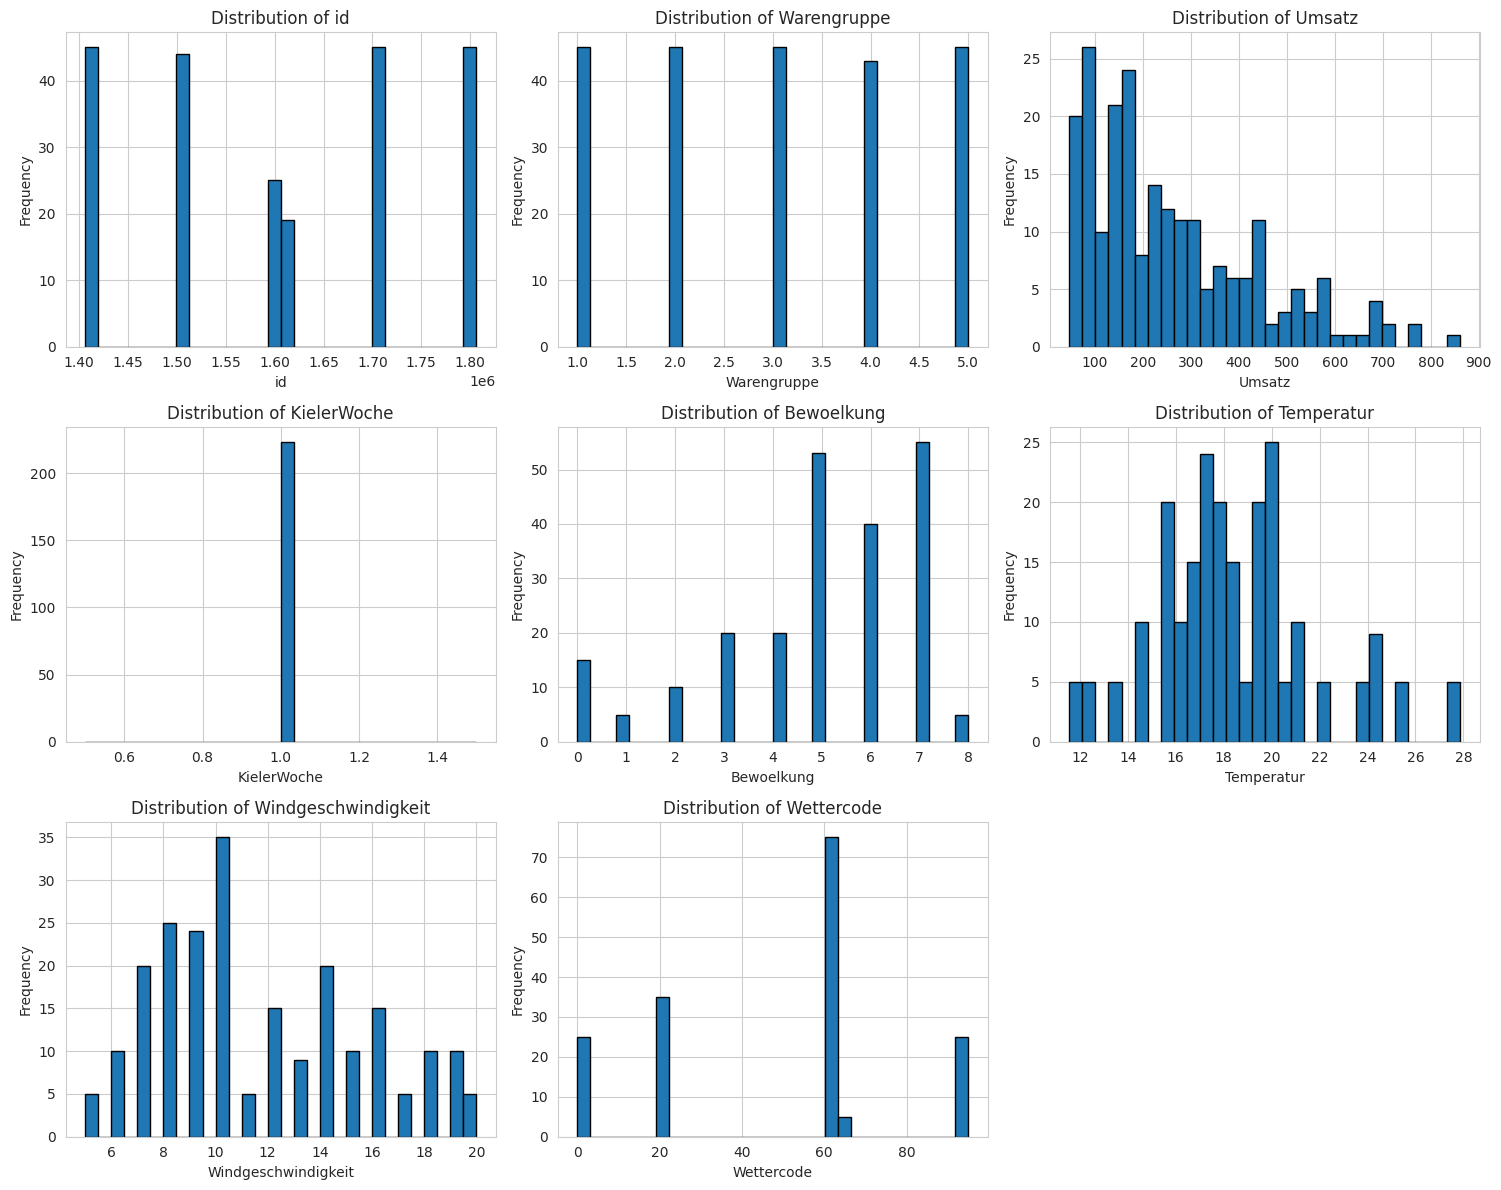

In [23]:
# Distribution plots for numeric variables
numeric_cols = merged_df.select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(len(numeric_cols)//3 + 1, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].hist(merged_df[col].dropna(), bins=30, edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide empty subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

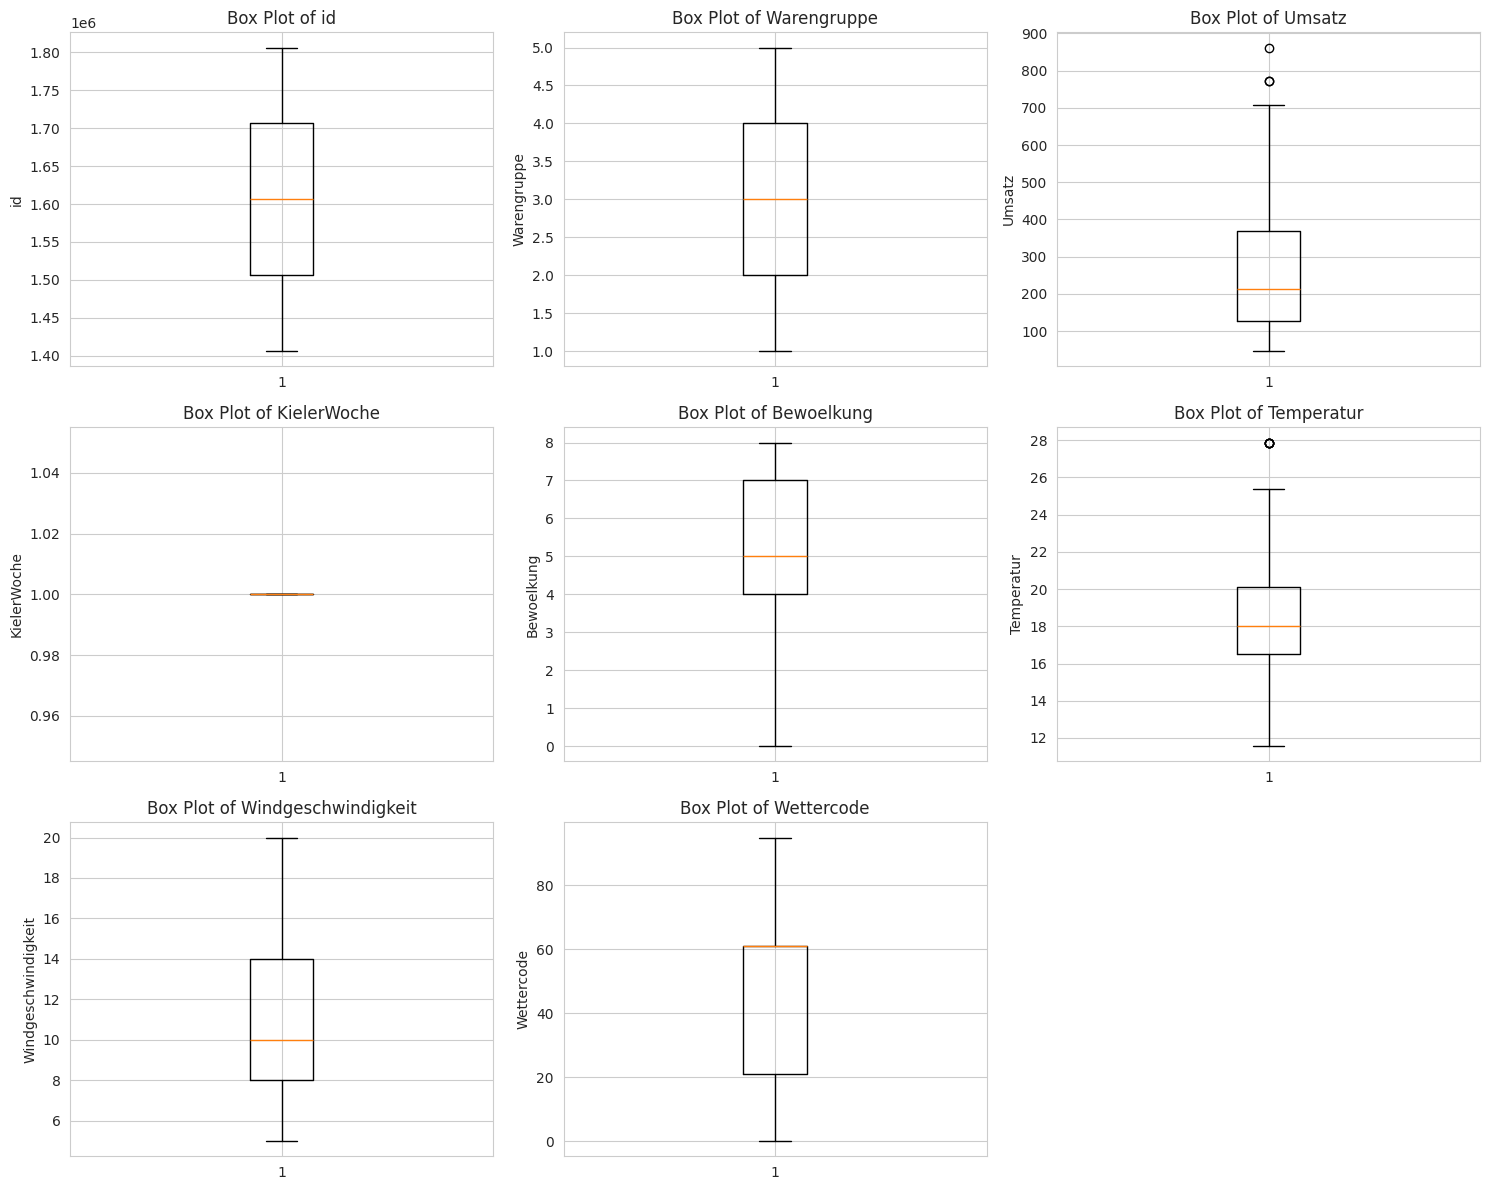

In [24]:
# Box plots to identify outliers
fig, axes = plt.subplots(len(numeric_cols)//3 + 1, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].boxplot(merged_df[col].dropna())
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_ylabel(col)

# Hide empty subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [25]:
# Time series plot (if date column exists)
# Uncomment and adjust based on your date column name
# merged_df['Datum'] = pd.to_datetime(merged_df['Datum'])
# merged_df_sorted = merged_df.sort_values('Datum')
#
# plt.figure(figsize=(14, 6))
# plt.plot(merged_df_sorted['Datum'], merged_df_sorted['Umsatz'])
# plt.title('Sales Over Time')
# plt.xlabel('Date')
# plt.ylabel('Sales')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

## 5. Summary and Insights

**Key findings to document:**
- Key patterns observed
- Correlations between variables
- Outliers and anomalies
- Recommendations for further analysis

In [26]:
# Export merged data if needed
# merged_df.to_csv('merged_data.csv', index=False)
# print('Merged data exported successfully!')